In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [195]:
import string
import gensim
import pymorphy2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

### Download data

In [33]:
data = pd.read_csv('../data/music_collection/proceed_translated_lyrics_clean_3.csv', index_col=False)

In [34]:
data.iloc[2227]

Unnamed: 0                                                              2227
level_0                                                                 5983
index                                                                   5983
artist                                                            круг ирина
title                                                    счастливы одинаково
lyrics                     Одним карамельным утром\nПроснуться в твоей фу...
clean_text                 карамельный утро просыпаться твой футболка ост...
clean_text_translated_2    caramel morning waking up your t-shirt stoppin...
clean_text_translated_3    caramel morning waking t-shirt stopping minute...
Name: 2227, dtype: object

### Building LDA Model

In [35]:
texts_list = [str(values).split() for values in data['clean_text_translated_3']]

In [36]:
id2word = corpora.Dictionary(texts_list)

In [37]:
corpus = []
for text in texts_list:
    corpus.append(id2word.doc2bow(text))

In [43]:
perplexity_nouns_metrics = []
coherence_nouns_metrics = []

for topic_n in range(7,32,2):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=topic_n, 
                                                random_state=42,
                                                update_every=1,
                                                chunksize=5000,
                                                passes=10,
                                                iterations=10,
                                                alpha='auto',
                                                per_word_topics=True)
    
    perplexity = lda_model.log_perplexity(corpus)
    perplexity_nouns_metrics.append(perplexity)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts_list, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_nouns_metrics.append(coherence_lda)
    
    lda_model.save(f'lyrics_lda_model_{topic_n}.model')
    print(topic_n)

7
9
11
13
15
17
19
21
23
25
27
29
31


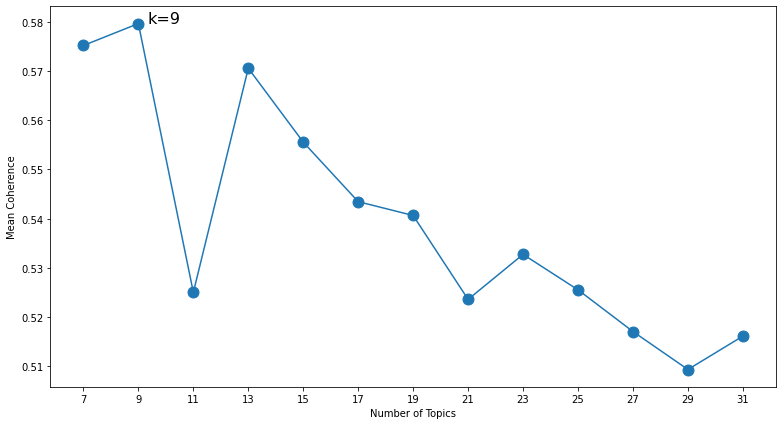

In [44]:
fig = plt.figure(figsize=(13, 7))

ax = plt.plot(list(range(7,32,2)), coherence_nouns_metrics)

plt.xticks(list(range(7,32,2)))
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")

plt.scatter(list(range(7,32,2)), coherence_nouns_metrics, s=120)

ymax = max(coherence_nouns_metrics)
xpos = coherence_nouns_metrics.index(ymax)
best_k = list(range(7,32,2))[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)

plt.show()

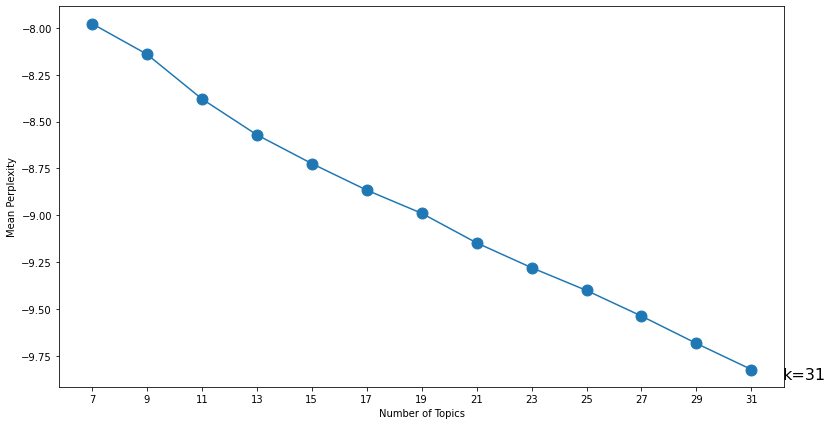

In [45]:
fig = plt.figure(figsize=(13,7))

ax = plt.plot(list(range(7,32,2)), perplexity_nouns_metrics)

plt.xticks(list(range(7,32,2)))
plt.xlabel("Number of Topics")
plt.ylabel("Mean Perplexity")

plt.scatter(list(range(7,32,2)), perplexity_nouns_metrics, s=120)

ymax = min(perplexity_nouns_metrics)
xpos = perplexity_nouns_metrics.index(ymax)
best_k = list(range(7,32,2))[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)

plt.show()

### Visualization

In [46]:
lda_model = gensim.models.ldamodel.LdaModel.load('lyrics_lda_model_31.model')

In [47]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
23    -0.077854  0.291383       1        1  12.578127
21    -0.175449  0.320507       2        1   8.812522
25    -0.100066  0.051875       3        1   7.271209
28     0.037355  0.130728       4        1   6.759247
14     0.117371  0.201046       5        1   6.138689
11     0.236023  0.302899       6        1   5.151432
7      0.180536  0.367163       7        1   5.076950
4     -0.193139 -0.014695       8        1   4.454198
29    -0.290338  0.245480       9        1   4.252801
13     0.045695  0.336123      10        1   3.880915
27     0.495296 -0.199426      11        1   3.385205
0     -0.006698  0.480924      12        1   3.218924
16    -0.286800  0.130668      13        1   3.047266
6     -0.268069  0.383567      14        1   2.618054
5      0.244924 -0.479982      15        1   2.559998
19    -0.451740  0.110258      16        1   2.134735
26    -0.013421 -0.097890      17        1   1.940137
10    -0.418994 -0.030737      18        1   1.813456
9      0.346374  0.208947      19        1   1.406756
8      0.344763  0.046044      20        1   1.403848
1     -0.306590 -0.205348      21        1   1.397401
15     0.139616 -0.371362      22        1   1.371758
17     0.520448  0.081118      23        1   1.357534
18    -0.123358 -0.445772      24        1   1.344352
12    -0.420439 -0.193691      25        1   1.202171
24     0.185203 -0.207548      26        1   1.119859
30     0.309338 -0.090507      27        1   1.087624
20    -0.133469 -0.268330      28        1   0.931937
22     0.332097 -0.290409      29        1   0.911054
2      0.005645 -0.395177      30        1   0.781274
3     -0.274259 -0.397854      31        1   0.590568, topic_info=       Term          Freq         Total Category  logprob  loglift
96     love  72499.000000  72499.000000  Default  30.0000  30.0000
174      oh  39462.000000  39462.000000  Default  29.0000  29.0000
133    yeah  30533.000000  30533.000000  Default  28.0000  28.0000
204    baby  28463.000000  28463.000000  Default  27.0000  27.0000
283    want  32563.000000  32563.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
2531   taxi    150.591605    399.609713  Topic31  -5.4083   4.1559
1860   drop    326.649732   3839.365680  Topic31  -4.6339   2.6677
185    soul    345.972314   8461.446169  Topic31  -4.5765   1.9349
479   right    309.424214  18333.562829  Topic31  -4.6881   1.0501
111    said    244.758879   8492.999636  Topic31  -4.9226   1.5851

[2136 rows x 6 columns], token_table=       Topic      Freq Term
term                       
26038     22  0.984348   07
26039     22  0.992855   08
4620       3  0.066029    1
4620       8  0.005354    1
4620      22  0.927078    1
...      ...       ...  ...
3472      24  0.992488    더
36817     24  0.990976   없어
3500      16  0.994454   이제
37098     24  0.993674   자꾸
36841     24  0.993812    해

[8514 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[24, 22, 26, 29, 15, 12, 8, 5, 30, 14, 28, 1, 17, 7, 6, 20, 27, 11, 10, 9, 2, 16, 18, 19, 13, 25, 31, 21, 23, 3, 4])

In [52]:
lda_model = gensim.models.ldamodel.LdaModel.load('lyrics_lda_model_13.model')

In [53]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.294838  0.000027       1        1  18.172398
7      0.212402 -0.113150       2        1  15.633900
4     -0.044063 -0.044358       3        1  13.545472
0      0.129360 -0.280559       4        1  13.061778
8     -0.031861 -0.345182       5        1   8.608680
11     0.329381 -0.267489       6        1   6.991808
1      0.121072  0.119504       7        1   6.370609
10    -0.202766 -0.286235       8        1   4.156977
5     -0.280047  0.394482       9        1   4.146535
3     -0.028008  0.486555      10        1   2.968831
2      0.293418  0.272701      11        1   2.825465
12    -0.305003  0.123594      12        1   2.010850
9     -0.488723 -0.059891      13        1   1.506697, topic_info=        Term          Freq         Total Category  logprob  loglift
96      love  71728.000000  71728.000000  Default  30.0000  30.0000
285    youre  28423.000000  28423.000000  Default  29.0000  29.0000
93      know  55891.000000  55891.000000  Default  28.0000  28.0000
339     girl  17820.000000  17820.000000  Default  27.0000  27.0000
174       oh  40021.000000  40021.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
14667    den    626.925869    839.412258  Topic13  -4.9186   3.9034
3963   drift    509.774624    618.205633  Topic13  -5.1255   4.0024
177     pump    704.537091   1140.952189  Topic13  -4.8019   3.7132
2174    jump    861.534138   2328.910309  Topic13  -4.6007   3.2008
1009      au    444.566329   1460.128170  Topic13  -5.2623   3.0061

[941 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
5403       8  0.993614        ""
6583       4  0.991495  "forgive
81732      5  0.999096  07102009
4620       1  0.034504         1
4620       3  0.168888         1
...      ...       ...       ...
390       13  0.044565         —
36772     10  0.997616         난
47377     10  0.998489         니
36779     10  0.998011         다
47758     10  0.998324        쩔어

[2755 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 8, 5, 1, 9, 12, 2, 11, 6, 4, 3, 13, 10])

### Users analysis

Get dataframe with music and users ids

In [70]:
music_df = pd.read_csv('../data/music_collection/music_as_df.csv')
music_df = music_df.drop(columns=['Unnamed: 0'])

In [71]:
music_df

,user_id,track_id,artist,title
0,600048599,456239017,sozONik,Мама\n
1,1247454,456239029,Metallica,Wherever I May Roam\n
2,1247454,456239027,Metallica,Whiskey In The Jar\n
3,1247454,456239026,Metallica,One\n
4,1247454,456239025,Metallica,Enter Sandman\n
...,...,...,...,...
300974,432185346,456239051,РВАТЬ НА БИТАХ,NKVD (3 RAUND)\n
300975,432185346,456239050,MARKUL & OBLADAET,Последний билет\n
300976,432185346,456239048,Rickey F,Tutti-Frutti\n
300977,432185346,456239047,СТАРЫЙ,Сукин сын\n


In [72]:
file = open('../users.txt', 'r')
users_to_search = file.read()
users_to_search = users_to_search.split('\n')
users_to_search = [int(_) for _ in users_to_search]
music_df = music_df.loc[music_df['user_id'].isin(users_to_search)]

music_df['artist'] = music_df['artist'].str.lower()
music_df['title'] = music_df['title'].str.lower()
music_df['title'] = music_df['title'].str.replace('\n', '')

/Users/eshchepina/YP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/eshchepina/YP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eshchepina/YP/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [82]:
music_df

,user_id,track_id,artist,title
1,1247454,456239029,metallica,wherever i may roam
2,1247454,456239027,metallica,whiskey in the jar
3,1247454,456239026,metallica,one
4,1247454,456239025,metallica,enter sandman
5,1247454,456239024,metallica,sad but true
...,...,...,...,...
300224,921524,125895718,игорь тальков,летний дождь
300225,921524,125894851,ferry corsten,holding on ferry corsten and shelley harland
300226,921524,122503489,the eagles,hotel california
300227,921524,122502772,t.i feat.christina aguilera,castle walls


In [83]:
music_df = music_df.drop(columns=['track_id'])

In [84]:
data

,Unnamed: 0,level_0,index,artist,title,lyrics,clean_text,clean_text_translated_2,clean_text_translated_3
0,0,0,0,metallica,wherever i may roam,...and the road becomes my bride\nI have strip...,road becomes bride stripped pride confide keep...,road becomes bride stripped pride confide keep...,road becomes bride stripped pride confide keep...
1,1,1,1,metallica,whiskey in the jar,As I was goin' over the Cork and Kerry mountai...,wa goin cork kerry mountain saw captain farrel...,wa goin cork kerry mountain saw captain farrel...,goin cork kerry mountain saw captain farrell m...
2,2,2,2,metallica,one,I can’t remember anything\nCan’t tell if this ...,cant remember anything cant tell true dream de...,cant remember anything cant tell true dream de...,cant remember anything cant tell true dream de...
3,3,3,3,metallica,enter sandman,"Say your prayers, little one\nDon't forget, my...",say prayer little one forget son include every...,say prayer little one forget son include every...,say prayer little one forget son include every...
4,4,4,4,metallica,sad but true,"Hey (Hey), I'm your life, I'm the one who take...",hey hey life one take hey hey life one care be...,hey hey life one take hey hey life one care be...,hey hey life one take hey hey life one care be...
...,...,...,...,...,...,...,...,...,...
41385,41385,124075,124075,"""зачарованные"" bewitched",blame it on the weatherman,It’s just one more day\nNo one said there woul...,one day one said would rain wont blame yeah il...,one day one said would rain wont blame yeah il...,one day one said would rain wont blame yeah il...
41386,41386,124076,124076,the cranberries,just my imagination (зачарованные 2 сезон),There was a game we used to play\nWe would hit...,wa game used play would hit town friday night ...,wa game used play would hit town friday night ...,game used play would hit town friday night sta...
41387,41387,124077,124077,the cranberries,animal instinct (зачарованные 1 сезон),Suddenly something has happened to me\nAs I wa...,suddenly something ha happened wa cup tea sudd...,suddenly something ha happened wa cup tea sudd...,suddenly something ha happened cup tea suddenl...
41388,41388,124081,124081,death on the balcony,adid with deeper sounds / ba in-flight radio show,"So your mouth tastes like sunshine, baby, but ...",mouth taste like sunshine baby eye cool buried...,mouth taste like sunshine baby eye cool buried...,mouth taste like sunshine baby eye cool buried...


In [87]:
data_new = data.drop(columns=['Unnamed: 0', 'level_0', 'index'])

In [98]:
result = pd.merge(music_df, data_new, on=['artist', 'title'])

In [99]:
result

,user_id,artist,title,lyrics,clean_text,clean_text_translated_2,clean_text_translated_3
0,1247454,metallica,wherever i may roam,...and the road becomes my bride\nI have strip...,road becomes bride stripped pride confide keep...,road becomes bride stripped pride confide keep...,road becomes bride stripped pride confide keep...
1,20355871,metallica,wherever i may roam,...and the road becomes my bride\nI have strip...,road becomes bride stripped pride confide keep...,road becomes bride stripped pride confide keep...,road becomes bride stripped pride confide keep...
2,1247454,metallica,whiskey in the jar,As I was goin' over the Cork and Kerry mountai...,wa goin cork kerry mountain saw captain farrel...,wa goin cork kerry mountain saw captain farrel...,goin cork kerry mountain saw captain farrell m...
3,731879,metallica,whiskey in the jar,As I was goin' over the Cork and Kerry mountai...,wa goin cork kerry mountain saw captain farrel...,wa goin cork kerry mountain saw captain farrel...,goin cork kerry mountain saw captain farrell m...
4,11704632,metallica,whiskey in the jar,As I was goin' over the Cork and Kerry mountai...,wa goin cork kerry mountain saw captain farrel...,wa goin cork kerry mountain saw captain farrel...,goin cork kerry mountain saw captain farrell m...
...,...,...,...,...,...,...,...
54571,60165968,"""зачарованные"" bewitched",blame it on the weatherman,It’s just one more day\nNo one said there woul...,one day one said would rain wont blame yeah il...,one day one said would rain wont blame yeah il...,one day one said would rain wont blame yeah il...
54572,60165968,the cranberries,just my imagination (зачарованные 2 сезон),There was a game we used to play\nWe would hit...,wa game used play would hit town friday night ...,wa game used play would hit town friday night ...,game used play would hit town friday night sta...
54573,60165968,the cranberries,animal instinct (зачарованные 1 сезон),Suddenly something has happened to me\nAs I wa...,suddenly something ha happened wa cup tea sudd...,suddenly something ha happened wa cup tea sudd...,suddenly something ha happened cup tea suddenl...
54574,465170,death on the balcony,adid with deeper sounds / ba in-flight radio show,"So your mouth tastes like sunshine, baby, but ...",mouth taste like sunshine baby eye cool buried...,mouth taste like sunshine baby eye cool buried...,mouth taste like sunshine baby eye cool buried...


In [100]:
result.to_csv('../data/music_collection/lyrics_with_users.csv',index=False)

### Create final dataset of users' embeddings

In [138]:
# An auxiliary function for getting corpus from DF
def get_corpus(series):
    texts_list = [str(values).split() for values in series]
    id2word = corpora.Dictionary(texts_list)
    corpus = [id2word.doc2bow(text) for text in texts_list]
    return corpus

In [139]:
# Function for getting vectors of user's activities and opinions (posts and reposts) and interests (groups)
def analyze_user(user_id):
    user_music = result.loc[result['user_id'] == int(user_id)]
    user_corpus = get_corpus(user_music['clean_text_translated_3'])
    music_topics = lda_model[user_corpus]
    
    return music_topics

In [153]:
analyze_user(465170)[0][0]

[(0, 0.034908958),
 (2, 0.04788029),
 (4, 0.07643411),
 (6, 0.15258768),
 (7, 0.49118397),
 (8, 0.15330262),
 (11, 0.042222127)]

Итоговое количество пользователей с музыкой с текстами

In [141]:
users = list(set(result['user_id']))
len(users)

1241

In [155]:
topics_list = []
for user in users:
    topics_list.append(analyze_user(user)[0][0])

In [156]:
TOPICS_NUM = 13

In [159]:
users_topics_df = pd.DataFrame()
users_topics_df['user_id'] = users

for topic_n in range(TOPICS_NUM):
    tops_n = []
    
    for topic in topics_list:
        flag = False
        
        for item in topic:
            if item[0] == topic_n:
                tops_n.append(item[1])
                flag = True
        
        if not flag:
            tops_n.append(np.nan)
    
    users_topics_df[f'topic_{topic_n}'] = tops_n

In [160]:
users_topics_df

,user_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12
0,15056896,0.041877,NaN,0.120163,0.051338,0.048221,NaN,0.035866,0.559180,NaN,NaN,NaN,0.134816,NaN
1,17129473,0.027591,NaN,NaN,NaN,0.021504,NaN,NaN,0.925559,NaN,NaN,NaN,0.013834,NaN
2,265469959,0.016002,NaN,NaN,NaN,NaN,NaN,NaN,0.943408,NaN,NaN,NaN,0.028766,NaN
3,124739603,0.051515,NaN,NaN,NaN,NaN,0.083639,0.020263,0.830920,NaN,NaN,NaN,NaN,NaN
4,10698779,0.348907,NaN,NaN,NaN,NaN,NaN,NaN,0.601325,NaN,NaN,NaN,0.025428,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,190799835,0.015511,NaN,NaN,NaN,NaN,NaN,0.051883,0.752285,NaN,NaN,0.064301,0.100268,NaN
1237,96509927,0.024802,NaN,NaN,NaN,NaN,0.019853,0.028132,0.850212,NaN,NaN,0.016253,0.054170,NaN
1238,117088233,0.069760,NaN,NaN,NaN,NaN,NaN,0.070113,0.849944,NaN,NaN,NaN,NaN,NaN
1239,93609974,0.040703,NaN,NaN,NaN,0.025105,NaN,0.053927,0.696162,0.100868,NaN,NaN,0.067546,NaN


### Semantic analysis

Analyse semantics of topics' terms: using the polarity value (positive vs negative).

In [161]:
from senticnet.senticnet import SenticNet

In [162]:
sn = SenticNet()

In [173]:
terms_lyrics_topics = {'topic_0': ['love','baby', 'heart'], 
                           'topic_1': ['mind', 'dream', 'eye', 'die'],
                           'topic_2': ['bitch', 'shit', 'fuck', 'dumb'],
                           'topic_3': ['forget', 'sleep', 'heart', 'remember', 'friend'],
                           'topic_4': ['smoke', 'focus', 'brother', 'fuck'],
                           'topic_5': ['sky', 'light', 'shine', 'moon', 'beautiful'],
                           'topic_6': ['good', 'bad', 'crazy', 'high', 'work'],
                           'topic_7': ['dance', 'new'],
                           'topic_10': ['money']}

# 9(8), 10(9), 13(12) - иностранные языки

In [174]:
semantics_lyrics_topics = {key: [float(sn.polarity_value(word)) for word in value] for key, value in terms_lyrics_topics.items()}

In [175]:
semantics_lyrics_topics

{'topic_0': [0.83, 0.9, 0.9],
 'topic_1': [0.076, 0.9, 0.841, -0.17],
 'topic_2': [-0.83, -0.81, -0.83, -0.81],
 'topic_3': [-0.7, 0.9, 0.9, 0.9, 0.298],
 'topic_4': [-0.85, 0.792, 0.324, -0.83],
 'topic_5': [0.109, 0.9, 0.067, 0.913, 0.778],
 'topic_6': [0.191, -0.8, 0.9, 0.085, 0.9],
 'topic_7': [0.311, 0.9],
 'topic_10': [0.065]}

In [199]:
semantics_lyrics_topics_mean = {}
for topic in [f'topic_{_}'for _ in range(13)]:
    if topic in semantics_lyrics_topics:
        semantics_lyrics_topics_mean[topic] = mean(semantics_lyrics_topics[topic])

In [200]:
semantics_lyrics_topics_mean

{'topic_0': 0.8766666666666666,
 'topic_1': 0.41175,
 'topic_2': -0.8200000000000001,
 'topic_3': 0.4596,
 'topic_4': -0.14099999999999996,
 'topic_5': 0.5534000000000001,
 'topic_6': 0.2552,
 'topic_7': 0.6055,
 'topic_10': 0.065}

In [180]:
for topic in [f'topic_{_}'for _ in range(13)]:
    if topic in semantics_lyrics_topics:
        users_topics_df[f'{topic}_scaled'] = mean(semantics_lyrics_topics[topic]) * users_topics_df[topic]

Replace all nans to 0

In [190]:
for i in [0, 1, 2, 3, 4, 5, 6, 7, 10]:
    topic = f'topic_{i}_scaled'

    users_topics_df[topic] = users_topics_df[topic].replace(np.nan, 0)

In [192]:
users_topics_df['sum'] = users_topics_df['topic_0_scaled'] + users_topics_df['topic_1_scaled'] + users_topics_df['topic_2_scaled'] + users_topics_df['topic_3_scaled'] + users_topics_df['topic_4_scaled'] + users_topics_df['topic_5_scaled'] + users_topics_df['topic_6_scaled'] + users_topics_df['topic_7_scaled'] + users_topics_df['topic_10_scaled']

In [193]:
users_topics_df

,user_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_0_scaled,topic_1_scaled,topic_2_scaled,topic_3_scaled,topic_4_scaled,topic_5_scaled,topic_6_scaled,topic_7_scaled,topic_10_scaled,sum
0,15056896,0.041877,NaN,0.120163,0.051338,0.048221,NaN,0.035866,0.559180,NaN,...,0.036712,0.0,-0.098533,0.023595,-0.006799,0.000000,0.009153,0.338583,0.000000,0.302710
1,17129473,0.027591,NaN,NaN,NaN,0.021504,NaN,NaN,0.925559,NaN,...,0.024188,0.0,0.000000,0.000000,-0.003032,0.000000,0.000000,0.560426,0.000000,0.581582
2,265469959,0.016002,NaN,NaN,NaN,NaN,NaN,NaN,0.943408,NaN,...,0.014028,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.571234,0.000000,0.585262
3,124739603,0.051515,NaN,NaN,NaN,NaN,0.083639,0.020263,0.830920,NaN,...,0.045162,0.0,0.000000,0.000000,0.000000,0.046286,0.005171,0.503122,0.000000,0.599741
4,10698779,0.348907,NaN,NaN,NaN,NaN,NaN,NaN,0.601325,NaN,...,0.305875,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.364102,0.000000,0.669977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,190799835,0.015511,NaN,NaN,NaN,NaN,NaN,0.051883,0.752285,NaN,...,0.013598,0.0,0.000000,0.000000,0.000000,0.000000,0.013240,0.455509,0.004180,0.486526
1237,96509927,0.024802,NaN,NaN,NaN,NaN,0.019853,0.028132,0.850212,NaN,...,0.021743,0.0,0.000000,0.000000,0.000000,0.010987,0.007179,0.514804,0.001056,0.555769
1238,117088233,0.069760,NaN,NaN,NaN,NaN,NaN,0.070113,0.849944,NaN,...,0.061156,0.0,0.000000,0.000000,0.000000,0.000000,0.017893,0.514641,0.000000,0.593690
1239,93609974,0.040703,NaN,NaN,NaN,0.025105,NaN,0.053927,0.696162,0.100868,...,0.035683,0.0,0.000000,0.000000,-0.003540,0.000000,0.013762,0.421526,0.000000,0.467431


In [197]:
users_topics_df['sum'].describe()

count    1241.000000
mean        0.512152
std         0.117136
min         0.038520
25%         0.467431
50%         0.553862
75%         0.591752
max         0.771661
Name: sum, dtype: float64

Define users' playlists size

In [203]:
def analyze_count_user_music(user_id):
    user_music = result.loc[result['user_id'] == int(user_id)]
    return len(list(user_music.values))

In [204]:
users_playlist_size = [analyze_count_user_music(u) for u in users]

Define top-1 topic for every user

In [237]:
top_topics = []

for i in range(len(users)):
    df_part = users_topics_df.iloc[i].drop('user_id')
    topics = df_part.iloc[:13]
    try: 
        top_topic = topics.nlargest(2).index[1]
    except:
        top_topic = topics.nlargest(2).index[0]
    top_topics.append(int(top_topic.split('_')[1]))

### Visualization

In [241]:
topics_test = [str(_) for _ in top_topics]

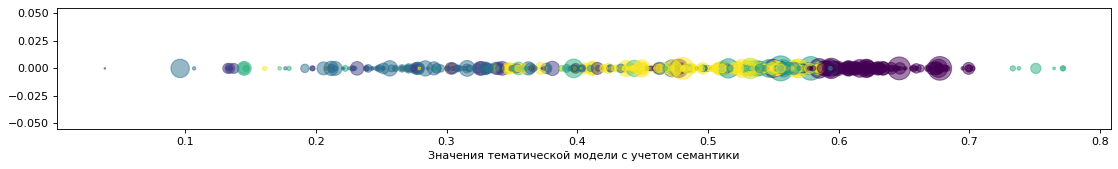

In [246]:
from matplotlib.pyplot import figure

figure(figsize=(17, 2), dpi=80)

colors = np.random.rand(1241)
plt.scatter(x=users_topics_df['sum'].values, 
            y=[0]*1241, 
            s=users_playlist_size,
            c=top_topics,
            alpha=0.5)
plt.xlabel('Значения тематической модели с учетом семантики')
plt.show()